# Analysis of Yandex.Afisha marketing expenses.

## Step 1. Download data and prepare it for analysis.

In [1]:
# Importing all necessary libraries.
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
# Loading in data:
    # Using try & execpt to check for different locations where data may be stored.
    # Changing certian data types to category and datetime to optimize data.
try:
    costs = pd.read_csv(
        '../Sprint_8/costs_us.csv',
        parse_dates= ['dt'],
        dtype = {'source_id': 'category'}
)
except:
    costs = pd.read_csv(
        '/datasets/costs_us.csv',
        parse_dates= ['dt'],
        dtype = {'source_id': 'category'}
)
    
try:
    visits_log = pd.read_csv(
        '../Sprint_8/visits_log_us.csv',
        parse_dates= ['End Ts', 'Start Ts'],
        dtype = {'Device': 'category','Source Id': 'category'} 
)
except:
     visits_log = pd.read_csv(
        '/datasets/visits_log_us.csv',
        parse_dates= ['End Ts', 'Start Ts'],
        dtype = {'Device': 'category','Source Id': 'category'} 
)
        
try:
    orders_log = pd.read_csv(
        '../Sprint_8/orders_log_us.csv',
        parse_dates = ['Buy Ts']
)
except:
    orders_log = pd.read_csv(
        '/datasets/orders_log_us.csv',
        parse_dates = ['Buy Ts']
)   

In [3]:
costs.info()
print()
visits_log.info()
print()
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 

In [4]:
# Renaming columns to match snakecase naming convention.
costs = costs.rename(
    columns={'dt':'date'
            }
)
visits_log = visits_log.rename(
    columns={'Device': 'device',
             'End Ts': 'end_ts',
             'Source Id': 'source_id',
             'Start Ts': 'start_ts',
             'Uid': 'uid'
            }
)
orders_log = orders_log.rename(
    columns={'Buy Ts': 'buy_ts',
             'Revenue': 'revenue',
             'Uid': 'uid'
            }
)

# Printing all the column names after renaming.
print('Columns in costs data frame:')
for col in costs.columns:
    print (col)
print()

print('Columns in visits_log data frame:')
for col in visits_log.columns:
    print(col)
print()

print('Columns in orders_log data frame:')
for col in orders_log.columns:
    print (col)
print()

Columns in costs data frame:
source_id
date
costs

Columns in visits_log data frame:
device
end_ts
source_id
start_ts
uid

Columns in orders_log data frame:
buy_ts
revenue
uid



In [5]:
# Checking for any duplicated rows.
costs_duplicates = costs.duplicated().sum()
visits_log_duplicates  = visits_log.duplicated().sum()
orders_log_duplicates = orders_log.duplicated().sum()

print(costs_duplicates, 'duplicate rows in costs data frame.')
print(visits_log_duplicates, 'duplicate rows in visits_log data frame.')
print(orders_log_duplicates, 'duplicate rows in orders_log data frame.')

0 duplicate rows in costs data frame.
0 duplicate rows in visits_log data frame.
0 duplicate rows in orders_log data frame.


In [6]:
print('visits_log data frame:')
print(visits_log.isna().sum())
print()
print('orders_log data frame:')
print(orders_log.isna().sum())
print()
print('costs data frame:')
print(costs.isna().sum())

visits_log data frame:
device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

orders_log data frame:
buy_ts     0
revenue    0
uid        0
dtype: int64

costs data frame:
source_id    0
date         0
costs        0
dtype: int64


#### Data has been prepared for analysis with the following steps:
    - 3 csv files were loaded into data frames.
    - Data types were changed to optimize the data.
    - .info() was used to check for missing values.
    - Column names were changed to match snake case naming.
    - .duplicated() was used to check for any repeating rows.
    - .isna() was also used to check for missing values.

## Step 2.  Make reports and calculate metrics:

### 1. Product

#### How many people use it every, week and month?

In [7]:
# Extracting the date, week of year, month, year from start_ts column.
visits_log['session_date'] = visits_log['start_ts'].dt.date
visits_log['session_dow'] = visits_log['start_ts'].dt.day_name()
visits_log['session_week'] = visits_log['start_ts'].astype('datetime64[W]')
visits_log['session_month'] = visits_log['start_ts'].astype('datetime64[M]')
visits_log['session_year'] = visits_log['start_ts'].dt.isocalendar().year

In [8]:
# Calulating active user activity.
dau_total = int(visits_log.groupby('session_date').agg({'uid':'nunique'}).mean())
wau_total = int(visits_log.groupby('session_week').agg({'uid':'nunique'}).mean())
mau_total = int(visits_log.groupby('session_month').agg({'uid':'nunique'}).mean())

In [9]:
print('On average there are:')
print()
print(dau_total, 'unique daily users.')
print(wau_total, 'unique weekly users.')
print(mau_total, 'unique monthly users.')

On average there are:

907 unique daily users.
5724 unique weekly users.
23228 unique monthly users.


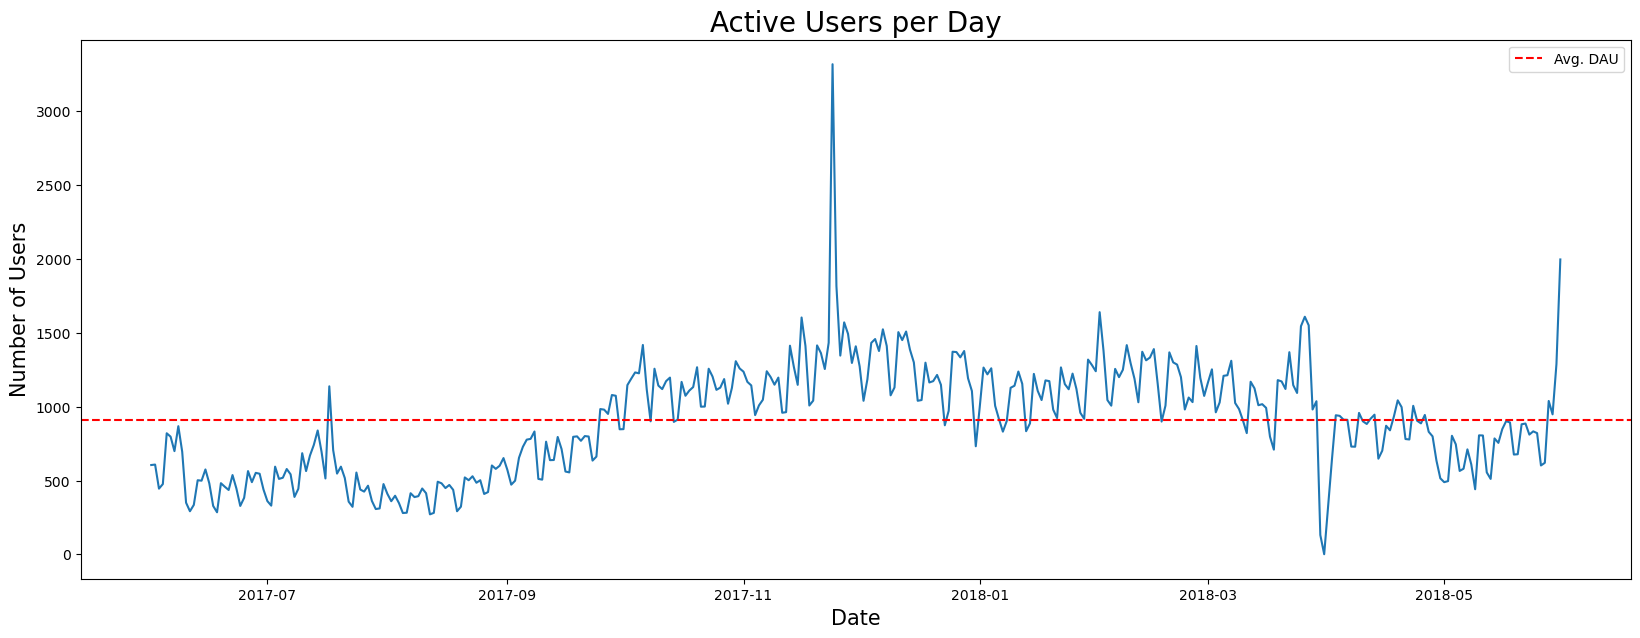

In [10]:
daily_usage = visits_log.groupby('session_date').agg({'uid':'nunique'}).reset_index()

plt.figure(figsize = (20,7))
plt.plot(
    daily_usage['session_date'],
    daily_usage['uid']
)
plt.axhline(dau_total, color='r', linestyle='--', label = 'Avg. DAU')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Users', fontsize=15)
plt.title('Active Users per Day', fontsize=20)
plt.legend()
plt.show()

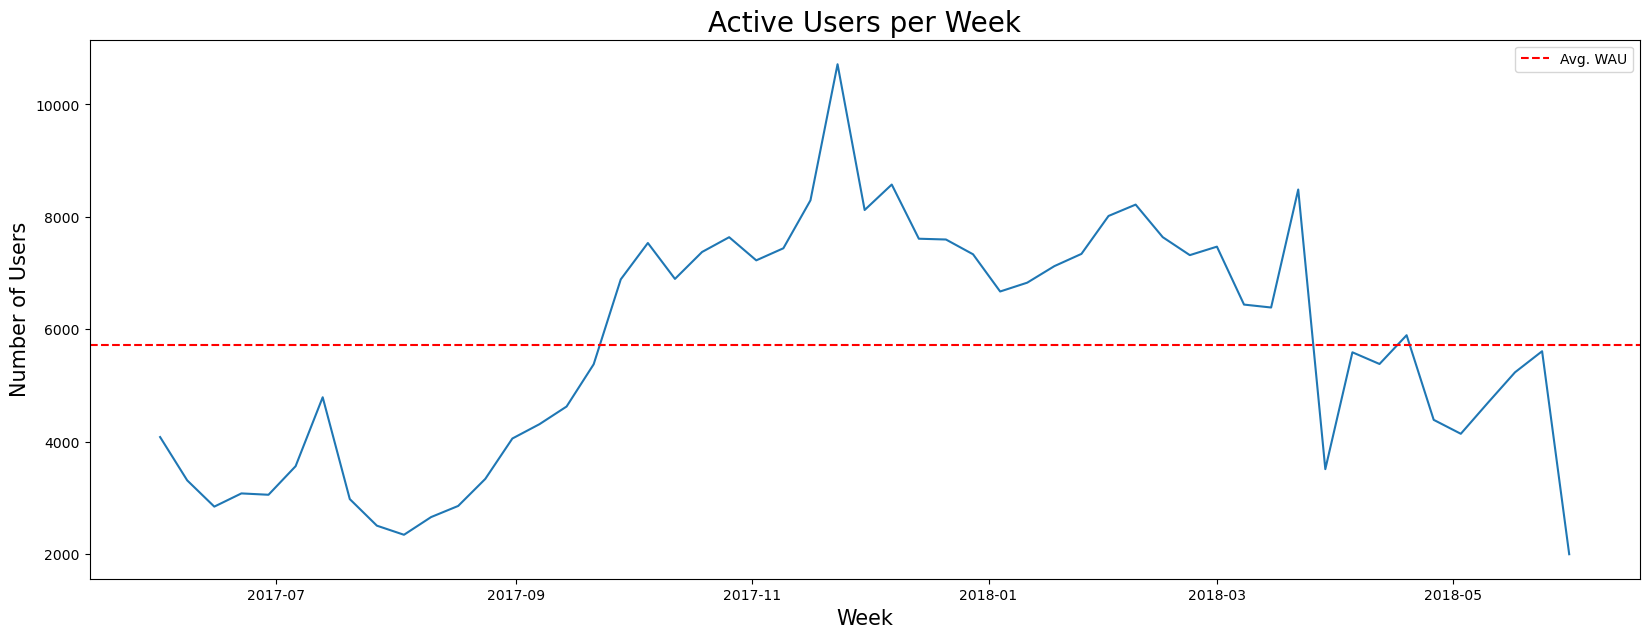

In [11]:
weekly_users = visits_log.groupby('session_week').agg({'uid':'nunique'}).reset_index()

plt.figure(figsize = (20,7))
plt.plot(
    weekly_users['session_week'],
    weekly_users['uid']
)
plt.axhline(wau_total, color='r', linestyle='--', label = 'Avg. WAU')
plt.xlabel('Week', fontsize=15)
plt.ylabel('Number of Users', fontsize=15)
plt.title('Active Users per Week', fontsize=20)
plt.legend()
plt.show()

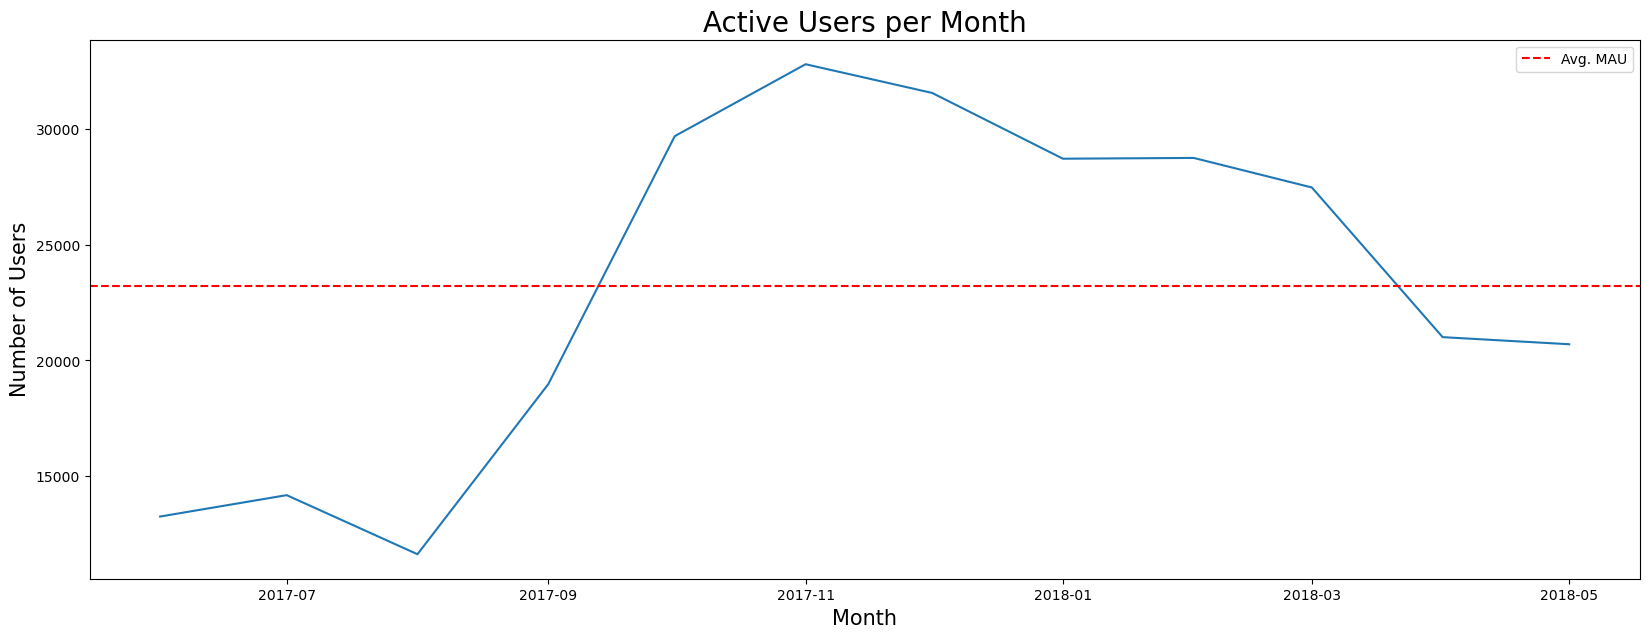

In [12]:
# Grouping data by month and aggregating total unique users.
monthly_usage = visits_log.groupby('session_month').agg({'uid':'nunique'}).reset_index()

# Showing the data in form of line plot.
plt.figure(figsize=(20,7))
plt.plot(
    monthly_usage['session_month'],
    monthly_usage['uid']
)
plt.axhline(mau_total, color='r', linestyle='--', label = 'Avg. MAU')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Users', fontsize=15)
plt.title('Active Users per Month', fontsize=20)
plt.legend()
plt.show()

#### Conclusion: 
    - All 3 plots show winter months have around twice the number of Users compared to summer months.
    - The lowest point is right around the end of summer, it stats to raise through out fall and peaks in November/December.     
    - Perhaps tailoring articles for this time of year will be helpful to boost visits.
    - Subscription discount during this time may help boost visits during the slower summer months.

#### How many sessions are there per day?

In [13]:
# Grouping data by 'session_date' and aggregating total unique users.
daily_sessions = int(visits_log.groupby('session_date').agg({'uid': 'count'}).mean())

print('There are:', daily_sessions, 'sessions each day on average.')

There are: 987 sessions each day on average.


In [14]:
# Grouping by month & aggregating with nunique(), count() to determine how average sessions per active user.
sessions_per_user = visits_log.groupby('session_date').agg({'uid': ['count','nunique']}).reset_index()

# Renaming columns to better match the data.
sessions_per_user.columns = ['session_date','n_sessions', 'n_users']

# Adding column 'session_per_user' by dividing 'n_sessions'/'n_users'
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions']/ sessions_per_user['n_users']
print(sessions_per_user)


    session_date  n_sessions  n_users  sessions_per_user
0     2017-06-01         664      605           1.097521
1     2017-06-02         658      608           1.082237
2     2017-06-03         477      445           1.071910
3     2017-06-04         510      476           1.071429
4     2017-06-05         893      820           1.089024
..           ...         ...      ...                ...
359   2018-05-27         672      620           1.083871
360   2018-05-28        1156     1039           1.112608
361   2018-05-29        1035      948           1.091772
362   2018-05-30        1410     1289           1.093871
363   2018-05-31        2256     1997           1.129695

[364 rows x 4 columns]


In [15]:
# Making a list of months for use in charts later.
months = [
    '06/2017',
    '07/2017',
    '08/2017',
    '09/2017',
    '10/2017',
    '11/2017',
    '12/2017',
    '01/2018',
    '02/2018',
    '03/2018',
    '04/2018',
    '05/2018'
]

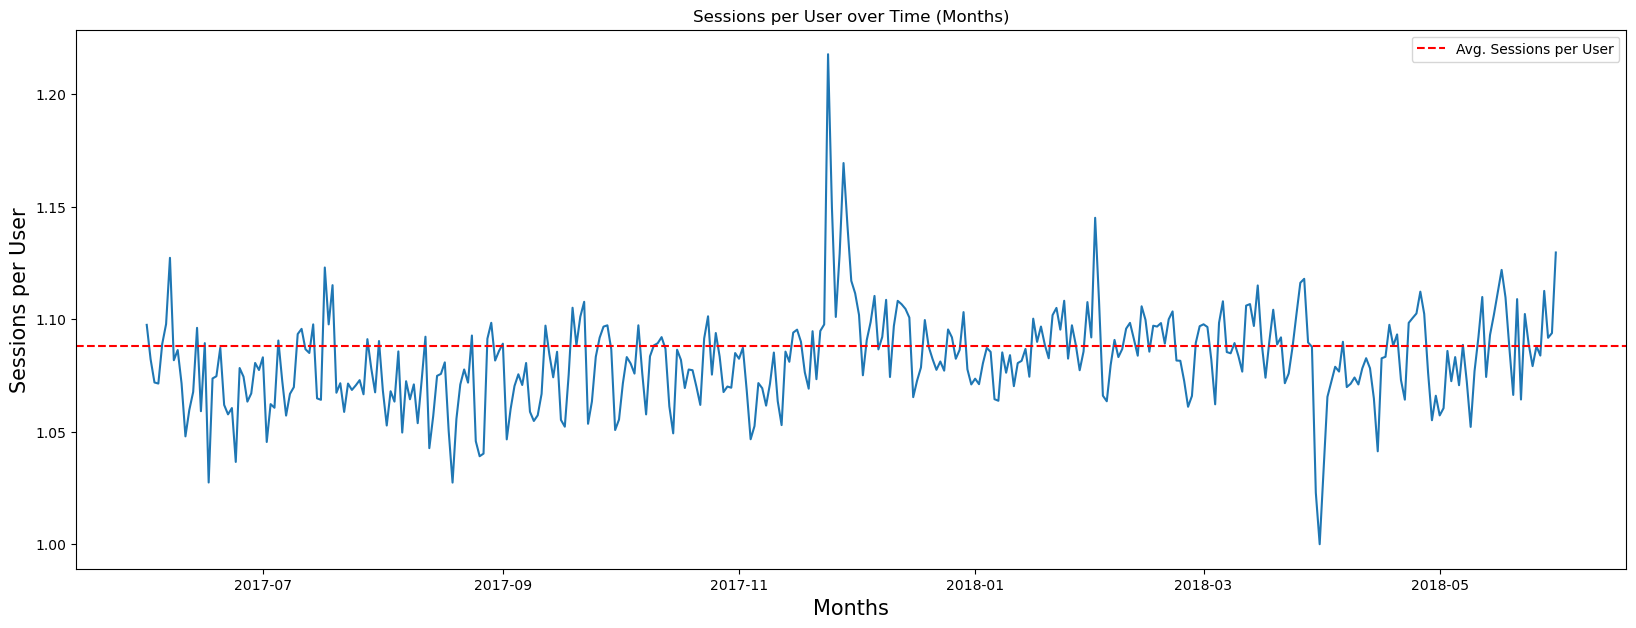

In [16]:
# Showing the data in form of a line plot.
plt.figure(figsize=(20,7))
plt.plot(
    sessions_per_user['session_date'],
    sessions_per_user['sessions_per_user']
)
plt.axhline((daily_sessions/dau_total), color='r', linestyle='--', label = 'Avg. Sessions per User')
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Sessions per User', fontsize = 15)
plt.title('Sessions per User over Time (Months)')
plt.legend()
plt.show()

#### Conclusion: 
    - There is a slight uptick in sessions_per_user during the winter months.
    - Overall there is only a small variation in Sessions per User, ranging between ~(1.25 -1.35).
    - Sessions_per_User is close to 1 which means vast majority of users only visit once a month.
    - Perhaps changing it from monthly to bi-monthly publication will boost Sessions_per_User(by Month).

#### What is the length of each session?

In [17]:
# Creating 'session_length' column, by subtracting 'start_ts' from 'end_ts'.
visits_log['session_length'] = visits_log['end_ts'] - visits_log['start_ts']

# Calculating the mean across the whole column.
avg_session_length = visits_log['session_length'].mean()

# 'avg_session_length' is a timedelta. Using the following formulae we can extract minutes & seconds.
total_seconds = avg_session_length.seconds 
minutes  = (total_seconds % 3600) // 60
hours =  total_seconds // 3600
seconds = total_seconds % 60

print('The average session length is', minutes,'min &',seconds, 'sec.')

The average session length is 10 min & 43 sec.


In [18]:
# Converting the 'session_length' column from timedelta to numeric.
visits_log['session_length'] = ((visits_log['session_length'] / np.timedelta64 (1, 's')).round()).astype('int')

In [19]:
# Grouping data by Date and aggregating the mean session length.
session_by_date = visits_log.groupby('session_date').agg({'session_length': 'mean'}).reset_index()

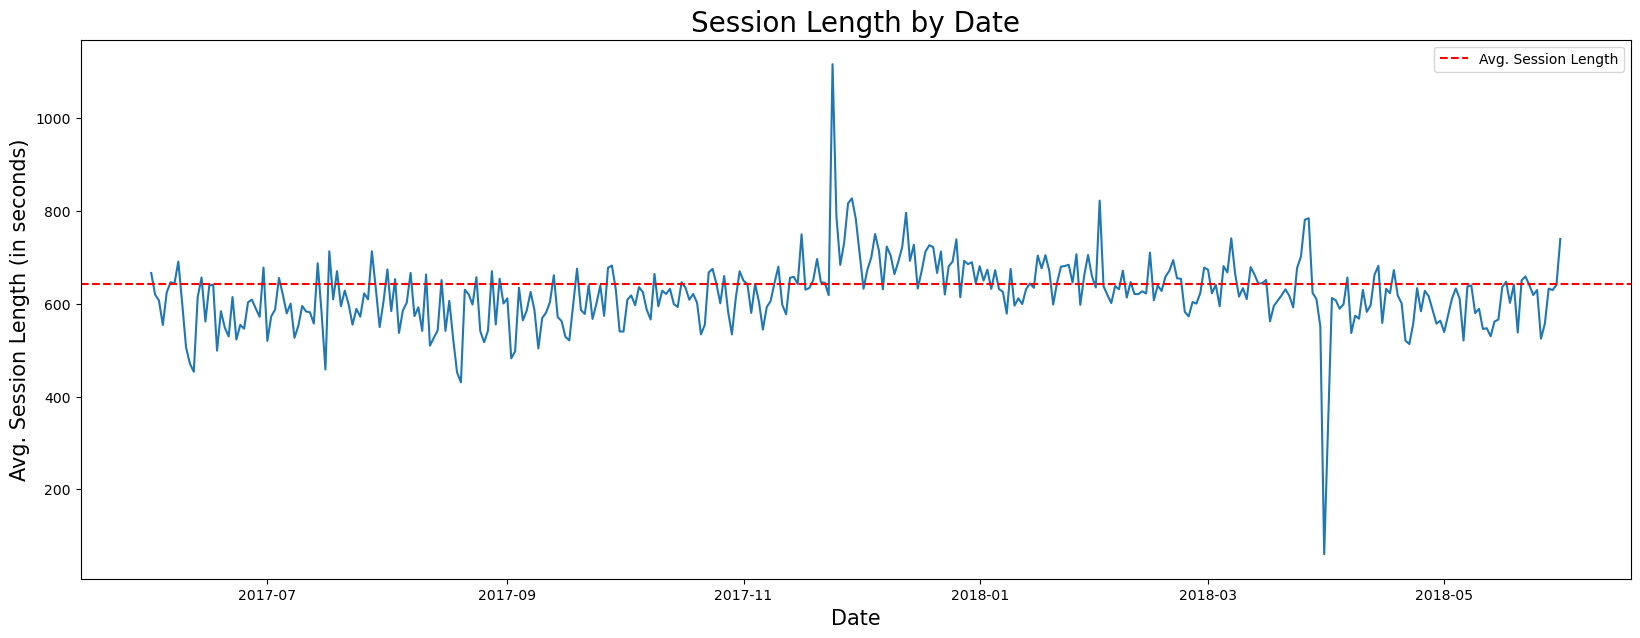

In [20]:
# Showing the data in form of bar chart.
plt.figure(figsize=(20,7))
plt.plot(
    session_by_date['session_date'],
    session_by_date['session_length'],
)
plt.axhline(avg_session_length.seconds,color='r', linestyle='--', label = 'Avg. Session Length')
plt.xlabel('Date', fontsize=15)
plt.ylabel ('Avg. Session Length (in seconds)', fontsize=15)
plt.title('Session Length by Date', fontsize=20)
plt.legend()
plt.show()

<AxesSubplot:>

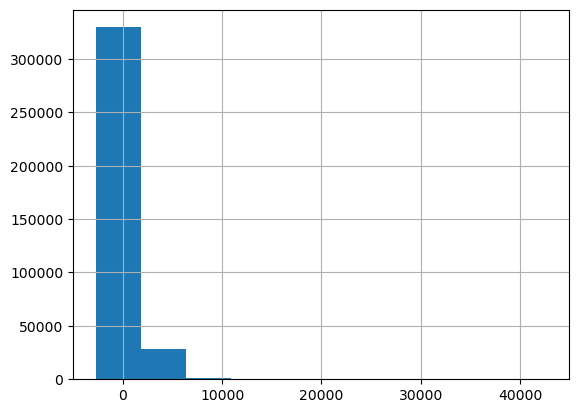

In [21]:
visits_log['session_length'].hist()

#### Conclusion:
    - Sessions are slightly shorter during the weekend compared to weekdays. Roughly 10% shorter.

#### What's the user retention rate?

In [22]:
# Creating a data frame with each users first visit date.
first_visit_date = visits_log.groupby('uid').agg({'session_date':'min'})

# Renaming columns to better match the data.
first_visit_date.columns = ['first_visit_date']

In [23]:
# Joining the first_visit_date to visits_log data frames.
visits_log = visits_log.join(first_visit_date, on = 'uid')

In [24]:
# Adding column 'first_visit_month' & 'visit_month' by:
    # by extracting month from respective column.
    # & changing to datetime data type.
visits_log['first_visit_month'] = visits_log['first_visit_date'].astype('datetime64[M]')
visits_log['visit_month'] = visits_log['session_date'].astype('datetime64[M]')

print(visits_log[['visit_month','first_visit_month']].head())
# We can confirm a successful join at index 3 (where the session_date and first_visit_date are different months).

  visit_month first_visit_month
0  2017-12-01        2017-12-01
1  2018-02-01        2018-02-01
2  2017-07-01        2017-07-01
3  2018-05-01        2018-03-01
4  2017-12-01        2017-12-01


In [25]:
# Creating 'cohort_lifetime' column, which is the number of lifetimes since start of cohort.
visits_log['cohort_lifetime'] = visits_log['visit_month'] - visits_log['first_visit_month']

# Converting 'cohort_lifetime':
    #from days to months &
    #data type from timedelta to integer.
visits_log['cohort_lifetime'] = (visits_log['cohort_lifetime']/ np.timedelta64(1, 'M')).round().astype('int')

In [26]:
# Grouping by lifetime and the number of active users in each cohort.
cohorts = visits_log.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

# Creating data frame to find initial number of uids at 0th month.
initial_uid_count = cohorts[cohorts['cohort_lifetime'] == 0] [['first_visit_month', 'uid']].reset_index()

# Renaming columns to better match the data.
initial_uid_count = initial_uid_count.rename(columns={'uid' : 'cohort_users'})

In [27]:
# Merging cohorts and initial_uid_count data frames.
cohorts = cohorts.merge(
    initial_uid_count,
    on = 'first_visit_month'
)

In [28]:
# Calculating retention by dividing number of uids in nth lifetime with 0 lifetime.
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [29]:
# Creating a pivot chart of cohorts and cohort lifetime.
retention_pivot = cohorts.pivot_table (
    index = 'first_visit_month',
    columns = 'cohort_lifetime',
    values = 'retention',
    aggfunc = 'sum'
)

retention_pivot.fillna('')

cohort_lifetime     0         1         2         3         4         5   \
first_visit_month                                                          
2017-06-01         1.0  0.078664  0.053775  0.061392  0.068557  0.071423   
2017-07-01         1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017-08-01         1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017-09-01         1.0  0.085489  0.069205  0.050706  0.039392  0.037835   
2017-10-01         1.0  0.078608  0.052239  0.038958  0.034261  0.032221   
2017-11-01         1.0  0.078281  0.044113  0.038682  0.033727  0.023415   
2017-12-01         1.0  0.055802  0.037993  0.031107  0.020263  0.019036   
2018-01-01         1.0  0.059715  0.039339  0.024973  0.020244             
2018-02-01         1.0   0.05708  0.025454  0.020093                       
2018-03-01         1.0  0.041818  0.027053                                 
2018-04-01         1.0   0.04838                                           
2018-05-01         1.0                                                     

cohort_lifetime          6         7         8         9         10        11  
first_visit_month                                                              
2017-06-01         0.061015  0.057772  0.052342  0.050833  0.040652  0.044951  
2017-07-01         0.045358  0.045738  0.038813  0.028615  0.027473            
2017-08-01         0.036342  0.039485  0.027895  0.026029                      
2017-09-01          0.03586  0.024186  0.022809                                
2017-10-01         0.021365  0.020364                                          
2017-11-01           0.0218                                                    
2017-12-01                                                                     
2018-01-01                                                                     
2018-02-01                                                                     
2018-03-01                                                                     
2018-04-01                                                                     
2018-05-01

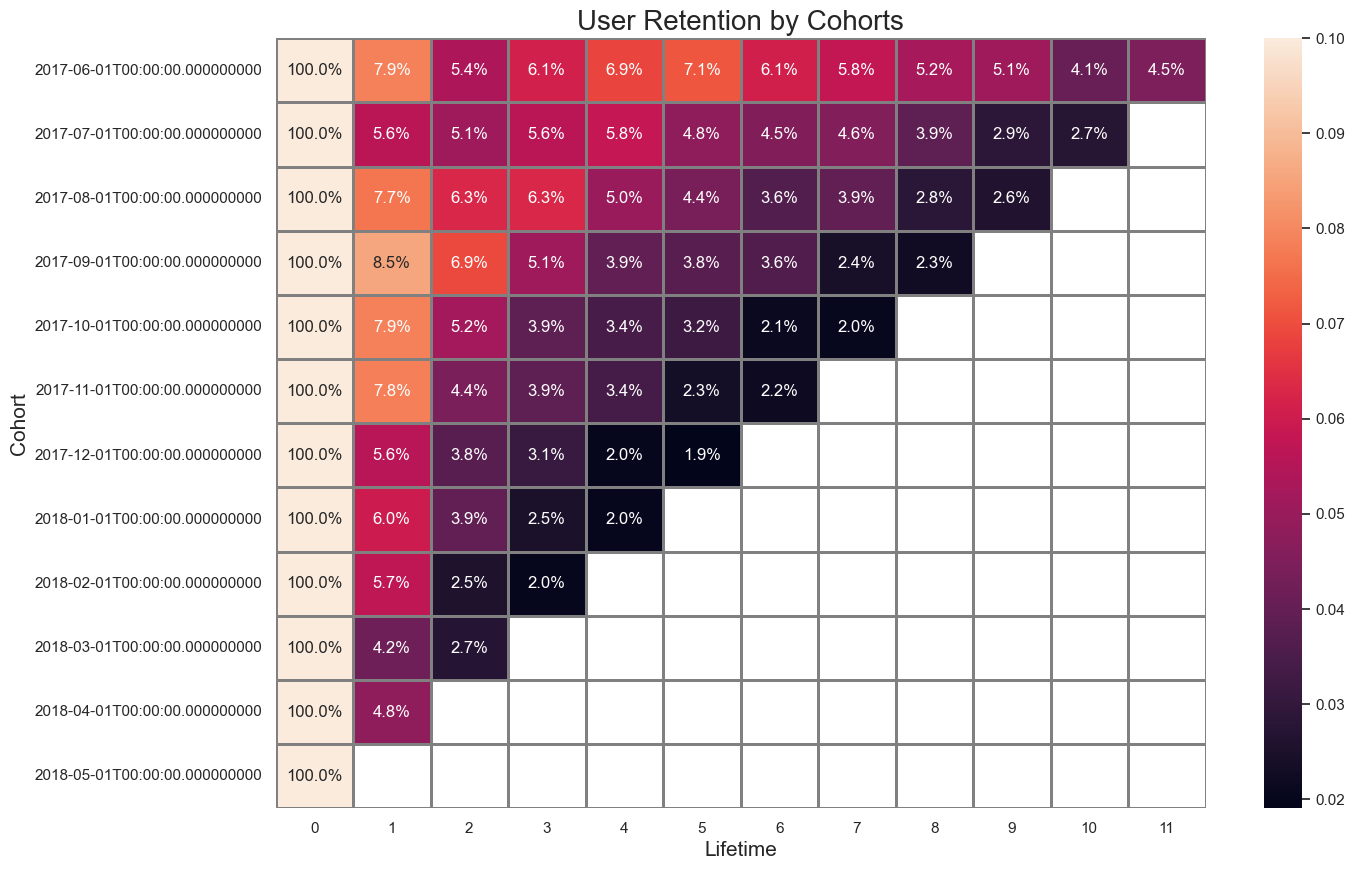

In [30]:
# Showing the data in form of heatmap.
sns.set(style='white')
plt.figure(figsize=(15, 10))
sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='gray',
    vmax = .1
)
plt.xlabel('Lifetime', fontsize=15)
plt.ylabel('Cohort', fontsize=15)
plt.title('User Retention by Cohorts', fontsize=20)
plt.show()

#### Conclusion: 
    - After Lifetime[0] wesite visite fall drastically to between 4.0% - 8.5%.
    - The greatest initial fall occurs in the spring months.
    - User visits keep falling over lifetimes.

### Sales

#### When do people start buying?

In [31]:
# Extracting the 'buy_ts_date' from 'buy_ts' and converting it to datetime data type.
orders_log['buy_ts_date']= orders_log['buy_ts'].dt.date
orders_log['buy_ts_date'] = pd.to_datetime(orders_log['buy_ts_date'])

In [32]:
# Grouping data by uid and aggregating first order date.
first_order_date = orders_log.groupby('uid').agg({'buy_ts_date':'min'}).reset_index()

# Renaming columns to better match the data.
first_order_date.columns = ['uid', 'first_order_date']

In [33]:
# Creating a data frame of first visit and first orders dates.
conversion_df = first_order_date.join(first_visit_date, on = 'uid', how = 'left',)

# Converting first_visit_date into datetime data type.
conversion_df['first_visit_date'] = pd.to_datetime(conversion_df['first_visit_date'])

In [34]:
# Creating 'conversion_time' column by:
    # by subtracting 'first_visit_date' from 'first_order_date'
    # & converting the resulting timedelta into days and integer.
conversion_df['conversion_time'] = ((conversion_df['first_order_date']- conversion_df['first_visit_date'])
                                    / np.timedelta64(1, 'D')).astype('int')

In [35]:
# Showing the data in form of histogram.
fig = px.histogram(
    conversion_df, 
    x = 'conversion_time',
    nbins = 35,
    title = 'Number Conversions over Time',
    labels = {
        'conversion_time': 'Conversion Time (days)',
        'count' : 'Number of Users'
    } 
)
fig.show()

In [36]:
# Creating source_df by extratcing the 'uid' & 'source_id' columns from visits_log data frame.
source_df = visits_log[['uid', 'source_id']]

# Droping all the duplicates so get an accurte merge.
print('Size before drop_duplicates():', source_df.shape)
source_df = source_df.drop_duplicates()
print('Size after drop_duplicates():', source_df.shape)

Size before drop_duplicates(): (359400, 2)
Size after drop_duplicates(): (277870, 2)


In [37]:
# Creating a data frame with 'source_id' & 'conversion_time'.
marketing_channel_df = conversion_df.merge(
    source_df,
    on = 'uid',
    how = 'left'
)

In [38]:
# Grouping the data by 'source_id' and aggregating mean conversion_time.
marketing = (marketing_channel_df.groupby('source_id').agg({'conversion_time':'mean'}).reset_index())

# Renaming columns to better match the data.
marketing.columns = ['source_id', 'mean_conversion_time']

marketing = marketing.drop([6,7])

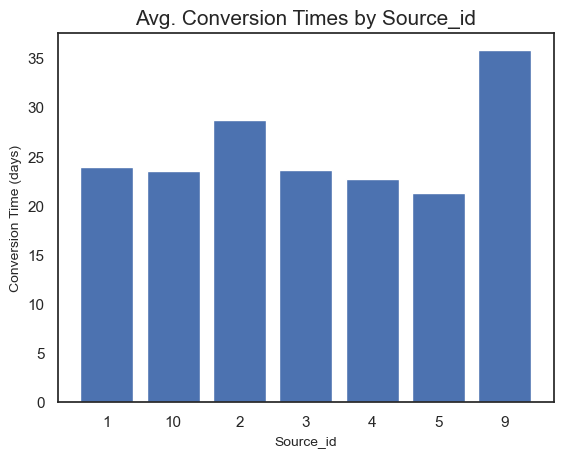

In [39]:
# Showing the data in form of bar chart.
plt.bar(
    marketing['source_id'],
    marketing['mean_conversion_time']
)
plt.xlabel('Source_id', fontsize=10)
plt.ylabel('Conversion Time (days)', fontsize=10)
plt.title('Avg. Conversion Times by Source_id', fontsize =15)
plt.show()

#### Conclusion:
    - Vast majority of users who convert will do so in the first day.
    - After conversion_day[0], conversion day falls rapidly.
    - Source_id 5 has the quickest conversion time.
    - Source_ids 1,3,4 & 10 also have quick conversion times. 2, 9 take the longest to convert.

#### How many orders do they make during a given period of time?

In [40]:
# Merging the orders_log and first_order_date data frames.
orders_append = pd.merge(
    orders_log,
    first_order_date,
    on = 'uid'
)

# Extracting the 'first_visit_month' from 'first_visit_date' and converting it to a datetime data type.
orders_append['first_order_month'] = (orders_append['first_order_date'].astype('datetime64[M]'))

# Extracing the 'buy_ts_month' from 'buy_ts_date' and converting it to datetime data type.
orders_append['buy_ts_month'] = orders_append['buy_ts'].astype('datetime64[M]')

In [41]:
# Grouping data by 'first_order_date' and aggregating the nunique uids.
cohort_sizes = orders_append.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()

# Renaming the columns to better match the data.
cohort_sizes.columns = ['first_order_month', 'n_users']

In [42]:
# Grouping the data by first_order_month and aggregating the uid count.
cohort = orders_append.groupby(['first_order_month','buy_ts_month']).agg({'uid':'count'}).reset_index()

# Renaming the columns to better match the data.
cohort.columns = ['first_order_month', 'buy_ts_month', 'n_orders']

# Merging the 2 data frames.
cohort= pd.merge(
    cohort,
    cohort_sizes,
    on ='first_order_month'
)

In [43]:
# Creating 'cohort_lifetime' column by:
    # by subtracting 'buy_ts_date' from 'first_order_date'
    # & converting the resulting timedelta into months and integer.
cohort['cohort_lifetime'] = ((((cohort['buy_ts_month'] - cohort['first_order_month'])
                                   / np.timedelta64(1, 'M'))
                                   .round())
                                   .astype('int'))

In [44]:
# Creating the 'orders_per_buyer' column.
cohort['orders_per_buyer'] = cohort['n_orders']/cohort['n_users']
cohort.head(10)

first_order_month buy_ts_month  n_orders  n_users  cohort_lifetime  \
0        2017-06-01   2017-06-01      2354     2023                0   
1        2017-06-01   2017-07-01       177     2023                1   
2        2017-06-01   2017-08-01       174     2023                2   
3        2017-06-01   2017-09-01       226     2023                3   
4        2017-06-01   2017-10-01       292     2023                4   
5        2017-06-01   2017-11-01       218     2023                5   
6        2017-06-01   2017-12-01       276     2023                6   
7        2017-06-01   2018-01-01       174     2023                7   
8        2017-06-01   2018-02-01       212     2023                8   
9        2017-06-01   2018-03-01       153     2023                9   

   orders_per_buyer  
0          1.163618  
1          0.087494  
2          0.086011  
3          0.111715  
4          0.144340  
5          0.107761  
6          0.136431  
7          0.086011  
8          0.104795  
9          0.075630

In [45]:
# Creating a pivot chart of cohort_lifetime and cohort(by first visit month).
orders_pivot = cohort.pivot_table(
    index = 'first_order_month',
    columns = 'cohort_lifetime',
    values = 'orders_per_buyer',
    aggfunc= 'mean'
).cumsum(axis=1)
orders_pivot.fillna('')

cohort_lifetime          0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01         1.163618  1.251112  1.337123  1.448838  1.593178  1.700939   
2017-07-01         1.136765  1.188768   1.25117  1.305252  1.342694  1.385335   
2017-08-01         1.118978   1.19781  1.270803  1.329927  1.391971  1.437226   
2017-09-01         1.136381  1.221232  1.283611  1.347152  1.373111  1.415343   
2017-10-01         1.143779  1.216129  1.253456  1.281567   1.31129  1.335023   
2017-11-01         1.179368  1.276648  1.321245  1.372948  1.406273   1.42073   
2017-12-01         1.152635  1.214237  1.260324  1.301164  1.320785  1.344741   
2018-01-01         1.121554  1.187963  1.235102  1.254076  1.277201             
2018-02-01         1.121611  1.182416  1.205149  1.224322                       
2018-03-01         1.168978   1.21936  1.269176                                 
2018-04-01         1.096221  1.181898                                           
2018-05-01         1.087349                                                     
2018-06-01         1.000000                                                     

cohort_lifetime          6         7         8         9         10        11  
first_order_month                                                              
2017-06-01          1.83737  1.923381  2.028176  2.103806  2.151261  2.193772  
2017-07-01         1.417057  1.443058  1.473219  1.485699  1.513261            
2017-08-01         1.472993  1.529927  1.563504   1.59708                      
2017-09-01         1.457187  1.478884  1.502518                                
2017-10-01         1.354839  1.383641                                          
2017-11-01         1.445724                                                    
2017-12-01                                                                     
2018-01-01                                                                     
2018-02-01                                                                     
2018-03-01                                                                     
2018-04-01                                                                     
2018-05-01                                                                     
2018-06-01

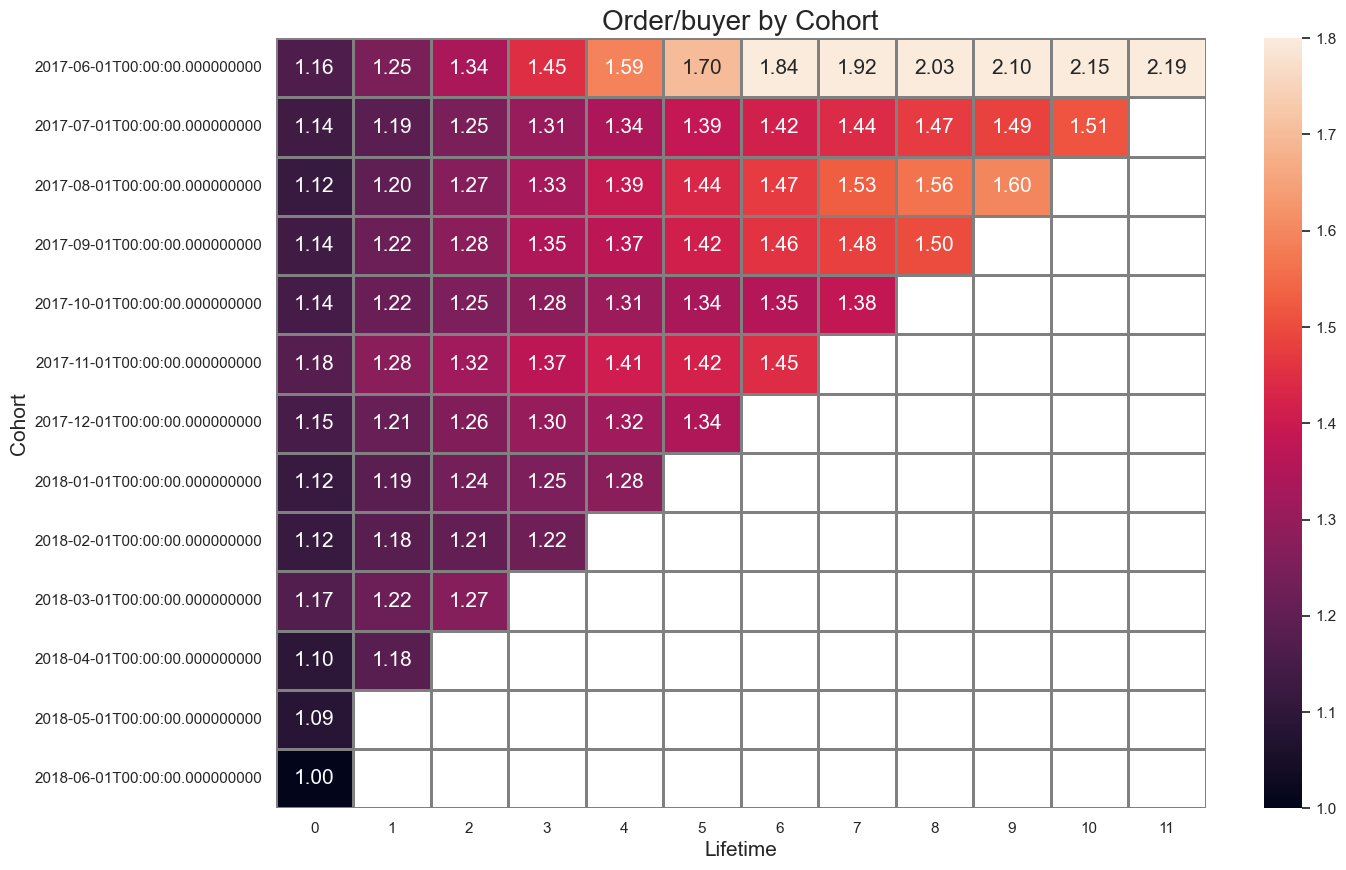

In [46]:
# Showing the data in form of a heatmap.
sns.set(style='white')
plt.figure(figsize=(15,10))
sns.heatmap(
    orders_pivot,
    annot = True,
    annot_kws = {'size':15},
    fmt = '.2f',
    linewidths = 1,
    linecolor = 'gray',
    vmax = 1.8)
plt.xlabel('Lifetime', fontsize = 15)
plt.ylabel('Cohort', fontsize = 15)
plt.title('Order/buyer by Cohort', fontsize=20)
plt.show()

#### Conclusion:
    - All of the Cohorts start with more than 1 order per buyer during Lifetime[0]
    - Lifetime[1] sees the biggest drop , ~95% drop occurs.
    - The lowest numbers are seen during the winter months.
    - The above data is consistent with all the charts above, drop in all metrics after lifetime [0].

#### What is the average purchase size?

In [47]:
# Calculating the mean revenue, formating it to $ and rounding to 2 decimals. 
average_purchase_size = '${:.2f}'.format(orders_log['revenue'].mean())
average_purchase_price = orders_log['revenue'].mean()
print('The average purchase size:', average_purchase_size)

The average purchase size: $5.00


In [48]:
# Extracting the 'buy_month' from 'buy_ts-date' & converting it to datetime.
orders_log['buy_ts_month'] = orders_log['buy_ts'].astype('datetime64[M]')

# Grouping the data by 'buy_ts_month' and aggregating the total reveunue.
orders_by_month = orders_log.groupby('buy_ts_month').agg({'revenue':'mean'}).reset_index()

orders_by_month = orders_by_month.drop(12)

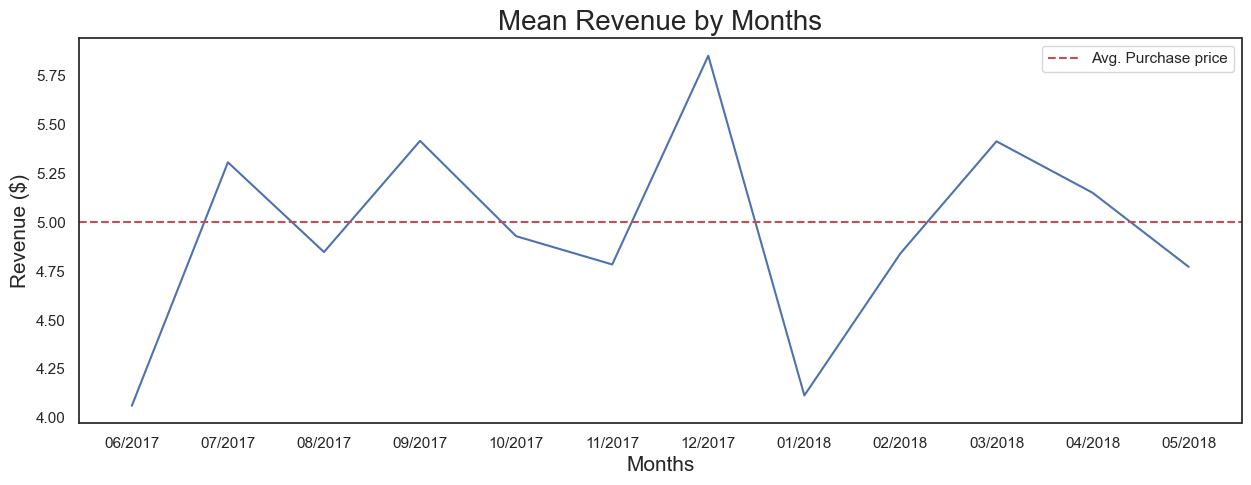

In [49]:
#Showing the data in form of a line plot.
plt.figure(figsize=(15,5))
plt.plot(
    months,
    orders_by_month['revenue']
)
plt.axhline(average_purchase_price, color='r', linestyle='--', label = 'Avg. Purchase price')
plt.title('Mean Revenue by Months', fontsize = 20)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Revenue ($)', fontsize =15)
plt.legend()
plt.show()

In [50]:
avg_cohort = orders_append.groupby(['first_order_month', 'buy_ts_month']).agg({'revenue':'mean'}).reset_index()
avg_cohort['age_month'] = (((((avg_cohort['buy_ts_month'])-(avg_cohort['first_order_month']))
                            / np.timedelta64(1,'M'))
                           .round())
                           .astype(int))
avg_cohort.head()

first_order_month buy_ts_month   revenue  age_month
0        2017-06-01   2017-06-01  4.060106          0
1        2017-06-01   2017-07-01  5.547006          1
2        2017-06-01   2017-08-01  5.088161          2
3        2017-06-01   2017-09-01  8.545575          3
4        2017-06-01   2017-10-01  7.084178          4

In [51]:
avg_cohort_pivot = avg_cohort.pivot_table(
    index = 'first_order_month',
    columns = 'age_month',
    values = 'revenue',
    aggfunc= 'mean'
)

avg_cohort_pivot.fillna('')

age_month                0          1          2          3          4   \
first_order_month                                                         
2017-06-01         4.060106   5.547006   5.088161   8.545575   7.084178   
2017-07-01         5.287123     6.4461   9.992083   6.637596   4.721806   
2017-08-01         4.715479   5.987315     6.2812   6.617901   7.962941   
2017-09-01         4.967109  13.171187   8.351056  62.570244  15.430448   
2017-10-01         4.374738   7.405127   5.127469   5.590246   5.098992   
2017-11-01         4.370717   4.103955    4.47467   6.284976   4.441471   
2017-12-01         4.110746   4.226741  20.072772  26.084358  15.948488   
2018-01-01         3.687417   4.438482   6.454969   7.524844   2.711282   
2018-02-01         3.706266   4.576486   3.453735   3.867143              
2018-03-01         4.139344   5.972191   6.334489                         
2018-04-01         4.248774   6.204718                                    
2018-05-01         4.286168                                               
2018-06-01         3.420000                                               

age_month                 5         6          7         8         9   \
first_order_month                                                       
2017-06-01          6.825321  6.966449   6.761839  5.279009  8.009869   
2017-07-01          3.659512  3.789508     5.4544   5.34569     11.79   
2017-08-01          6.265323      5.89    7.11359  8.702826  5.598478   
2017-09-01         15.321835  16.76713  11.206607  7.785574             
2017-10-01          5.071553  4.280233    4.00912                       
2017-11-01           3.72678  4.598235                                  
2017-12-01         14.111048                                            
2018-01-01                                                              
2018-02-01                                                              
2018-03-01                                                              
2018-04-01                                                              
2018-05-01                                                              
2018-06-01                                                              

age_month                 10        11  
first_order_month                       
2017-06-01         12.038125  6.042093  
2017-07-01          5.648302            
2017-08-01                              
2017-09-01                              
2017-10-01                              
2017-11-01                              
2017-12-01                              
2018-01-01                              
2018-02-01                              
2018-03-01                              
2018-04-01                              
2018-05-01                              
2018-06-01

#### Conclusion:
    - The mean Revenue is $5.00.
    - Revenue is higher during the winter months compared to summer.
    - This is consistent with all previous data, more website visits during the winter.
    - There is also a slight bump in mean revenue during December.

#### How much money do they bring? (LTV)

In [52]:
ltv_cohort = orders_append.groupby(['first_order_month','buy_ts_month']).agg({'revenue':'sum'}).reset_index()

In [53]:
ltv_cohort = pd.merge(
    ltv_cohort,
    cohort_sizes,
    on = 'first_order_month'
)

In [54]:
ltv_cohort['age'] = ((((ltv_cohort['buy_ts_month']-ltv_cohort['first_order_month'])
                       / np.timedelta64 (1,'M'))
                      .round())
                     .astype('int'))

In [55]:
ltv_cohort['ltv'] = ltv_cohort['revenue']/ltv_cohort['n_users']

In [56]:
ltv_cohort_pivot = ltv_cohort.pivot_table(
    index = 'first_order_month',
    columns = 'age',
    values = 'ltv',
    aggfunc = 'mean'
).cumsum(axis =1)
ltv_cohort_pivot.fillna('')

age                      0         1         2          3          4   \
first_order_month                                                       
2017-06-01         4.724414  5.209743   5.64738   6.602051   7.624582   
2017-07-01         6.010218  6.345429   6.96896   7.327936   7.504727   
2017-08-01         5.276518  5.748511  6.206993    6.59827   7.092321   
2017-09-01         5.644529  6.762115  7.283045  11.258838  11.659396   
2017-10-01         5.003733  5.539495  5.730889   5.888035   6.039594   
2017-11-01         5.154683  5.553916  5.753472   6.078424   6.226437   
2017-12-01         4.738191  4.998565  5.923662   6.988937   7.301866   
2018-01-01         4.135636  4.430394  4.734675   4.877453   4.940151   
2018-02-01         4.156987  4.435262  4.513777   4.587921              
2018-03-01         4.838803  5.139694  5.455253                         
2018-04-01         4.657597  5.189196                                   
2018-05-01         4.660562                                             
2018-06-01         3.420000                                             

age                       5          6         7          8          9   \
first_order_month                                                         
2017-06-01          8.360084   9.310524  9.892116  10.445329  11.051117   
2017-07-01          7.660775   7.780983  7.922803   8.084035    8.23118   
2017-08-01          7.375861   7.586526  7.991533   8.283745   8.471723   
2017-09-01         12.306463  13.008071  13.25122  13.435227              
2017-10-01          6.159956   6.244772  6.360242                         
2017-11-01          6.280316   6.395244                                   
2017-12-01          7.639913                                              
2018-01-01                                                                
2018-02-01                                                                
2018-03-01                                                                
2018-04-01                                                                
2018-05-01                                                                
2018-06-01                                                                

age                       10         11  
first_order_month                        
2017-06-01         11.622378  11.879234  
2017-07-01          8.386854             
2017-08-01                               
2017-09-01                               
2017-10-01                               
2017-11-01                               
2017-12-01                               
2018-01-01                               
2018-02-01                               
2018-03-01                               
2018-04-01                               
2018-05-01                               
2018-06-01

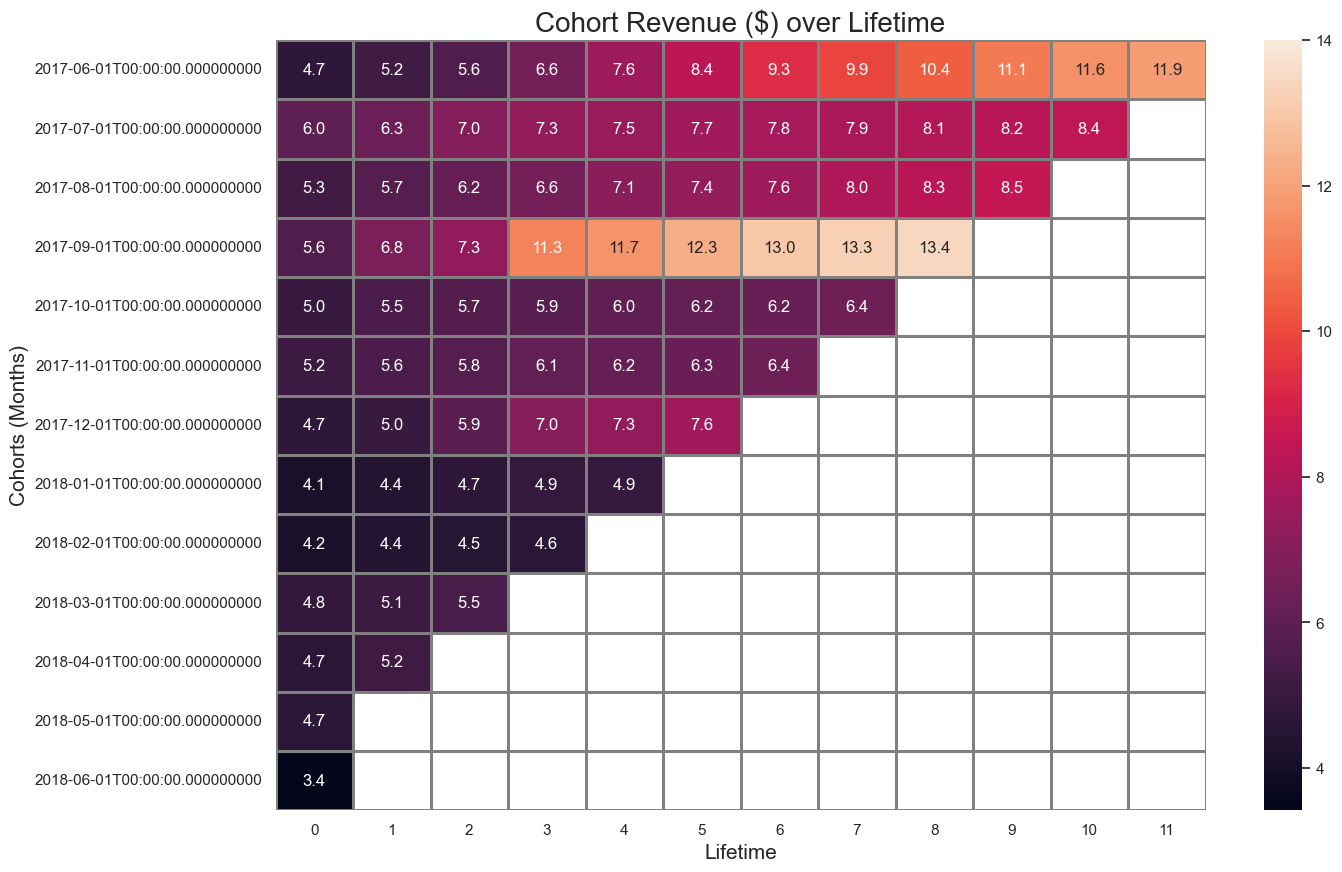

In [57]:
# Showing the data in form of heatmap.
sns.set(style ='white')
plt.figure(figsize = (15,10))
sns.heatmap(
    ltv_cohort_pivot,
    annot = True,
    fmt = '.1f',
    linewidths = 1,
    linecolor = 'gray',
    vmax = 14
)
plt.title('Cohort Revenue ($) over Lifetime', fontsize =20)
plt.xlabel('Lifetime', fontsize = 15)
plt.ylabel('Cohorts (Months)', fontsize =15)
plt.show()

#### Conclusion:
    - Similar to how website visits fell after Lifetime[0], revenue also falls drastically after first month.
    - Starting revenue is highest during the winter months, summer and early fall have the lowest.
    - Revenue falls about 90 - 95 % from Lifetime[0] to Lifetime[1].

### Marketing

#### How much money was spent? Overall, per source and over time.

In [58]:
print('The total marketing costs: $', (costs['costs'].sum()))

The total marketing costs: $ 329131.62


In [59]:
# Grouping the source_id and aggregating the total costs.
costs_per_source_id = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()

# Renaming columns to better match the data.
costs_per_source_id.columns = ['source_id', 'total_cost']

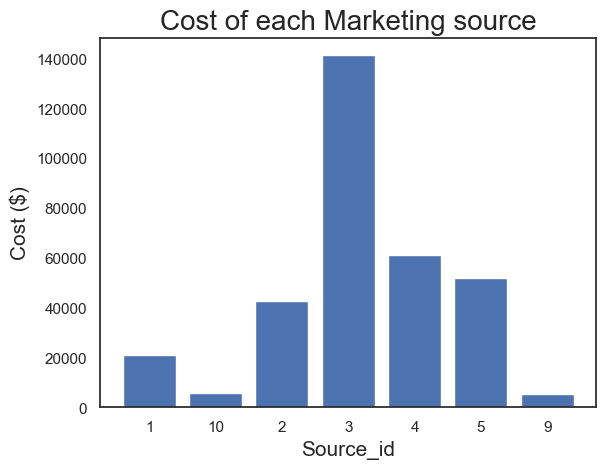

In [60]:
# Showing the data in form of bar chart.
plt.bar(
    costs_per_source_id['source_id'],
    costs_per_source_id['total_cost']
)
plt.xlabel('Source_id', fontsize =15)
plt.ylabel('Cost ($)', fontsize = 15)
plt.title('Cost of each Marketing source', fontsize=20)
plt.show()

In [61]:
costs['cost_month'] = costs['date'].astype('datetime64[M]')

In [62]:
# Grouping data by date and aggregating the total cost.
costs_over_time = costs.groupby('cost_month').agg({'costs':'sum'}).reset_index()

# Renaming the columns to better match the data.
costs_over_time.columns = ['month', 'total_cost']

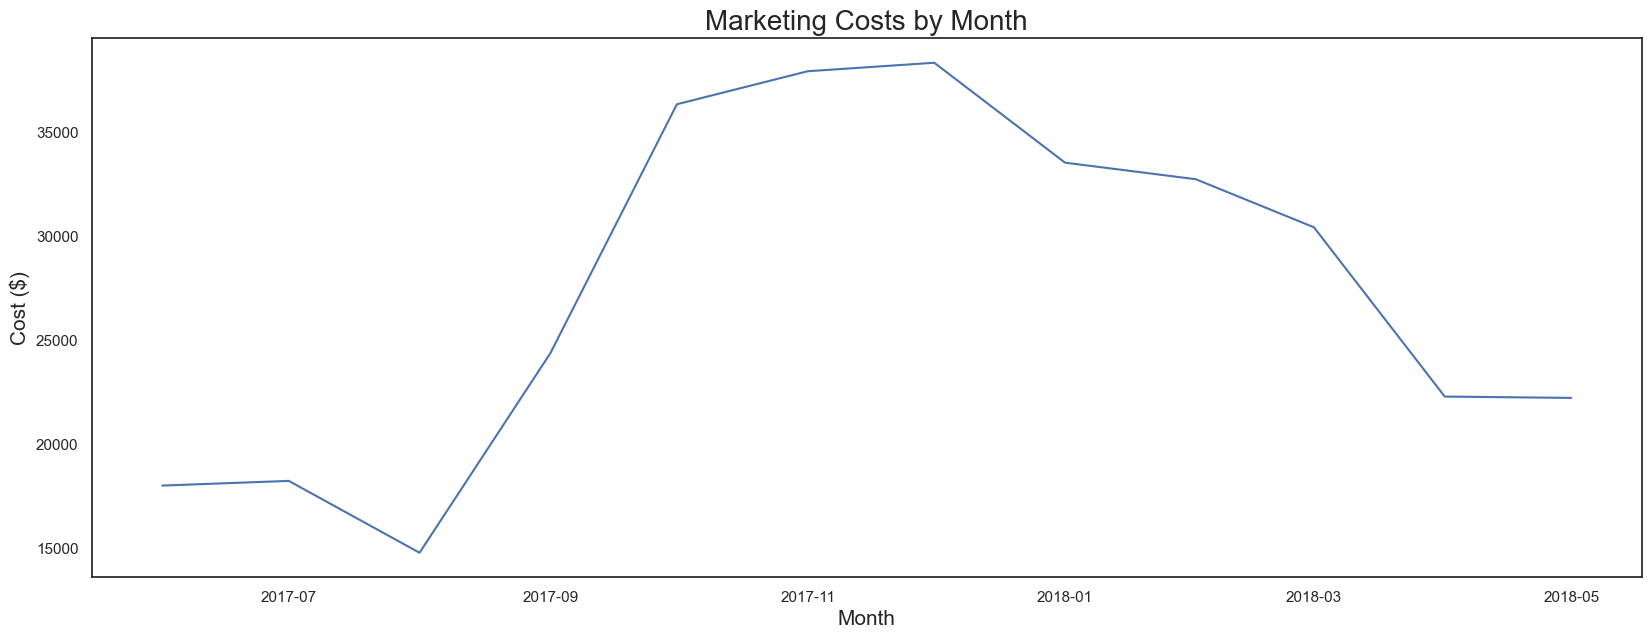

In [63]:
#Showing the data in form of a line plot.
plt.figure(figsize=(20,7))
plt.plot(
    costs_over_time['month'],
    costs_over_time['total_cost']
)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Cost ($)', fontsize = 15)
plt.title('Marketing Costs by Month', fontsize = 20)
plt.show()

In [64]:
fig = px.line(
    costs,
    x='date',
    y='costs',
    color='source_id'
)
fig.show()

#### Conclusion:
    - Source_id 3 had the highest overall cost, while source_id 10 had the least.
    - Overall Marketing costs stayed steady through out the year with winter seeing a slight bump.
    - Least costs were during the summer.

#### How much did customer acquisition from each of the sources cost?

In [65]:
overall_cac = (costs['costs'].sum()/(orders_append['uid'].nunique())).round()
print('Overall CAC is: $', overall_cac)

Overall CAC is: $ 9.0


In [66]:
costs_by_month = costs.groupby('cost_month').agg({'costs':'sum'}).reset_index()
costs_by_month.columns =['cost_month','total_costs']

In [67]:
buyers_by_month = orders_append.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
buyers_by_month.columns = ['cost_month', 'n_buyers']

In [68]:
cac_per_month = pd.merge(
    costs_by_month,
    buyers_by_month,
    how = 'left',
    on = 'cost_month'
)

In [69]:
cac_per_month['cac'] = cac_per_month['total_costs']/cac_per_month['n_buyers']

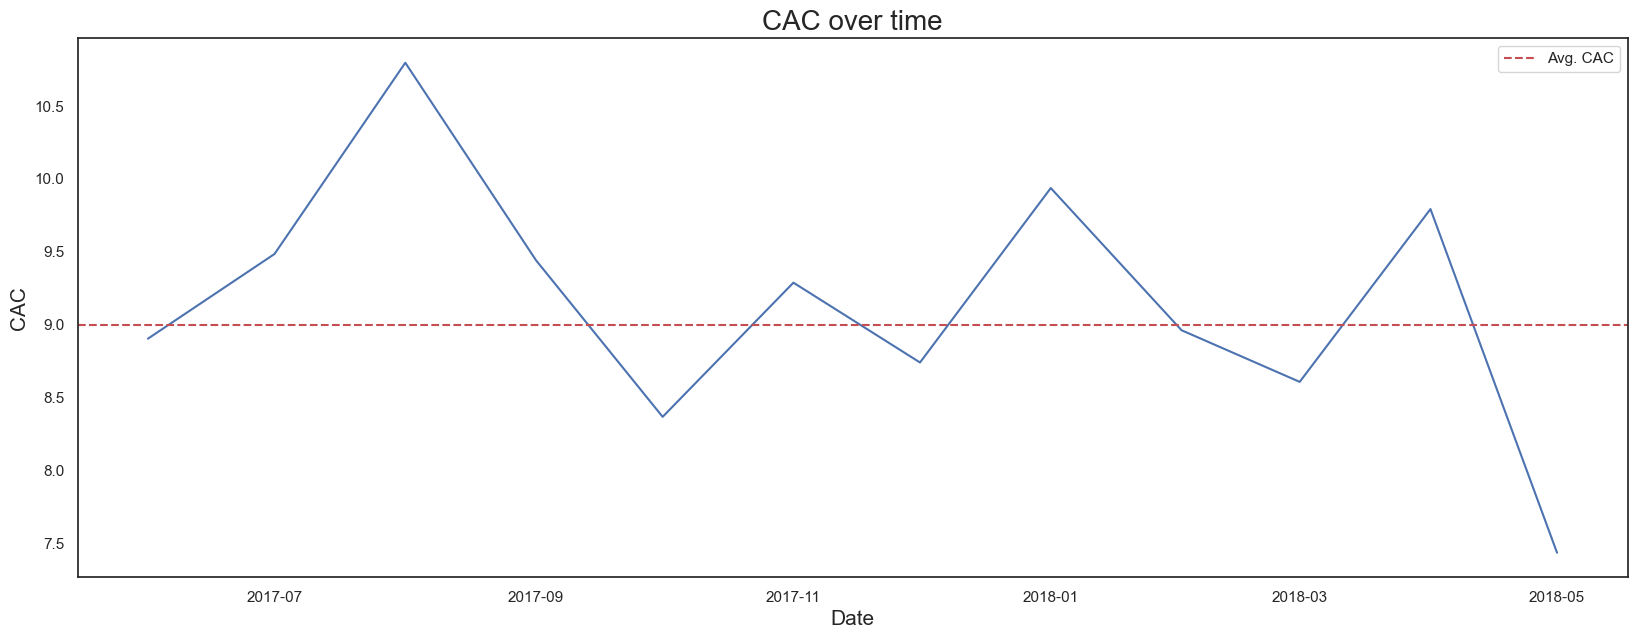

In [70]:
plt.figure(figsize=(20,7))
plt.plot(
    cac_per_month['cost_month'],
    cac_per_month['cac']
)
plt.axhline(overall_cac, color='r', linestyle='--', label = 'Avg. CAC')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('CAC', fontsize = 15)
plt.title('CAC over time', fontsize = 20)
plt.legend()
plt.show()

In [71]:
first_source = visits_log.sort_values('session_date').groupby('uid').first()['source_id'].reset_index()
first_source.columns=['uid','first_source']

In [72]:
orders_append = pd.merge(
    orders_append,
    first_source,
    on ='uid'
)

In [73]:
marketing_per_month_source = costs.groupby(['cost_month','source_id']).agg({'costs':'sum'}).reset_index()
marketing_per_month_source.columns = ['cost_month','source', 'total_cost']

In [74]:
buyers_per_month_source = orders_append.groupby(['first_order_month', 'first_source']).agg({'uid':'nunique'}).reset_index()
buyers_per_month_source.columns = ['cost_month', 'source', 'buyers']

In [75]:
cac_per_month_source = pd.merge(
    marketing_per_month_source,
    buyers_per_month_source,
    on =['cost_month', 'source'],
    how = 'left'
)
cac_per_month_source['cac'] = cac_per_month_source['total_cost']/cac_per_month_source['buyers']

In [76]:
fig = px.line(
    cac_per_month_source,
    x = 'cost_month',
    y ='cac',
    color = 'source'   
)
fig.show()

#### Conclusion:
    - Source_id 3 has the most costs overall and over time.
    - During the winter, marketing costs were slightly hihger compared to the rest of the year.
    - Souce_id's other than 2 and 3 have around the same costs.
    - Source_id 2 and 3 have the highest CAC, the rest of source_ids are around the same.
    - Overall CAC is consitant throughout the year.
    - The Avg. CAC is 9$.
    

#### How worthwhile where the investments? (ROI)

In [77]:
cac_per_month_roi = cac_per_month[['cost_month','cac']]
cac_per_month_roi.columns = ['first_order_month', 'cac']
roi= pd.merge(
    ltv_cohort,
    cac_per_month_roi,
    on = 'first_order_month',
    how = 'left'
)

In [78]:
roi['roi']=roi['ltv']/roi['cac']

In [79]:
roi_pivot = roi.pivot_table(
    index = 'first_order_month',
    columns = 'age',
    values = 'roi',
    aggfunc = 'mean'
).cumsum(axis=1).round(2)

In [80]:
roi_pivot.index=roi_pivot.index.astype('str')


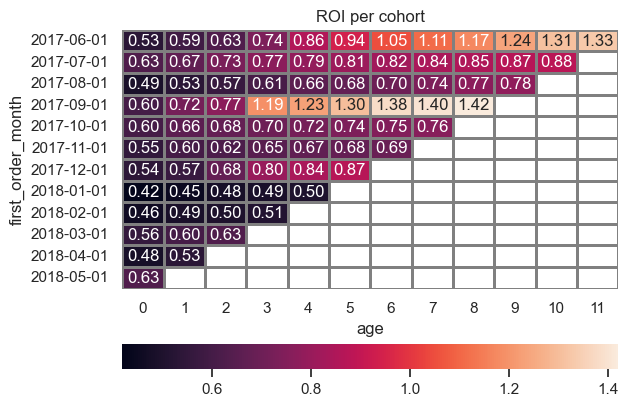

In [81]:
sns.heatmap(
    roi_pivot,
    annot = True,
    fmt = '.2f',
    linewidths = 1,
    linecolor = 'grey',
    cbar_kws = {'orientation':'horizontal'}
).set(title='ROI per cohort')
plt.show()

In [82]:
ltv_per_source = orders_append.groupby(['first_source'])['uid','revenue'].agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
ltv_per_source.columns = ['source', 'buyers', 'revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']

C:\Users\Dr_Na\AppData\Local\Temp\ipykernel_8772\3037031256.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [83]:
roi_per_source = pd.merge(
    costs_per_source_id,
    ltv_per_source,
    left_on = 'source_id',
    right_on = 'source'
)
roi_per_source['cac']=roi_per_source['total_cost']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

source_id  total_cost source  buyers   revenue        ltv        cac  \
0         1    20833.27      1    3365  34797.27  10.340942   6.191165   
1        10     5822.49     10    1302   4596.66   3.530461   4.471959   
2         2    42806.04      2    3556  45335.95  12.749142  12.037694   
3         3   141321.63      3   10137  51958.06   5.125585  13.941169   
4         4    61073.60      4    9999  55387.40   5.539294   6.107971   
5         5    51757.10      5    7109  54442.14   7.658199   7.280504   
6         9     5517.49      9    1054   5538.50   5.254744   5.234810   

       romi  
0  1.670274  
1  0.789466  
2  1.059102  
3  0.367658  
4  0.906896  
5  1.051878  
6  1.003808

In [84]:
fig = px.bar(
    roi_per_source,
    x='source',
    y='romi'
)
fig.update_xaxes(type='category')
fig.show()

#### Conclusion:
    - ROI per cohort shows that Roi increases to over 1 over lifetimes.
    - Cohort 1 acheived the highest ROI overall.
    - ROI starts at 0.5 and increases at a rate of ~5% - 10% over each lifetime.
    - Source_id 3 has the lowest ROMI, while source_id has the higest.

## Step 3. Conclusion

#### Data has been prepared for analysis with the following steps:
    - 3 csv files were loaded into data frames.
    - Data types were changed to optimize the data.
    - .info() was used to check for missing values.
    - Column names were changed to match snake case naming.
    - .duplicated() was used to check for any repeating rows.
    - .isna() was also used to check for missing values.
#### Analysis Conclusions:    
    - All 3 plots show winter months have around twice the number of Users compared to summer months.
    - The lowest point is right around the end of summer, it stats to raise through out fall and peaks in November/December.     
    - Perhaps tailoring articles for this time of year will be helpful to boost visits.
    - Subscription discount during this time may help boost visits during the slower summer months.
    - There is a slight uptick in sessions_per_user during the winter months.
    - Overall there is only a small variation in Sessions per User, ranging between ~(1.25 -1.35).
    - Sessions_per_User is close to 1 which means vast majority of users only visit once a month.
    - Perhaps changing it from monthly to bi-monthly publication will boost Sessions_per_User(by Month).
    - Sessions are slightly shorter during the weekend compared to weekdays. Roughly 10% shorter.
    - After Lifetime[0] wesite visite fall drastically to between 4.0% - 8.5%.
    - The greatest initial fall occurs in the spring months.
    - User visits keep falling over lifetimes.
    - Vast majority of users who convert will do so in the first day.
    - After conversion_day[0], conversion day falls rapidly.
    - Source_id 5 has the quickest conversion time.
    - Source_ids 1,3,4 & 10 also have quick conversion times. 2, 9 take the longest to convert.
    - All of the Cohorts start with more than 1 order per buyer during Lifetime[0]
    - Lifetime[1] sees the biggest drop , ~95% drop occurs.
    - The lowest numbers are seen during the winter months.
    - The above data is consistent with all the charts above, drop in all metrics after lifetime [0].
    - The mean Revenue is $5.00.
    - Revenue is higher during the winter months compared to summer.
    - This is consistent with all previous data, more website visits during the winter.
    - There is also a slight bump in mean revenue during December.
    - Similar to how website visits fell after Lifetime[0], revenue also falls drastically after first month.
    - Starting revenue is highest during the winter months, summer and early fall have the lowest.
    - Revenue falls about 90 - 95 % from Lifetime[0] to Lifetime[1].
    - Source_id 3 had the highest overall cost, while source_id 10 had the least.
    - Overall Marketing costs stayed steady through out the year with winter seeing a slight bump.
    - Least costs were during the summer.
    - Source_id 3 has the most costs overall and over time.
    - During the winter, marketing costs were slightly hihger compared to the rest of the year.
    - Souce_id's other than 2 and 3 have around the same costs.
    - Source_id 2 and 3 have the highest CAC, the rest of source_ids are around the same.
    - Overall CAC is consitant throughout the year.
    - ROI per cohort shows that Roi increases to over 1 over lifetimes.
    - Cohort 1 acheived the highest ROI overall.
    - ROI starts at 0.5 and increases at a rate of ~5% - 10% over each lifetime.
    - Source_id 3 has the lowest ROMI, while source_id has the higest.
    
    